# 1. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
forest_fire = pd.read_csv('data/forestfires.csv')
df = pd.read_csv('data/forestfires.csv')
forest_fire.head (10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [4]:
forest_fire.shape

(517, 13)

In [5]:
forest_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
forest_fire.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


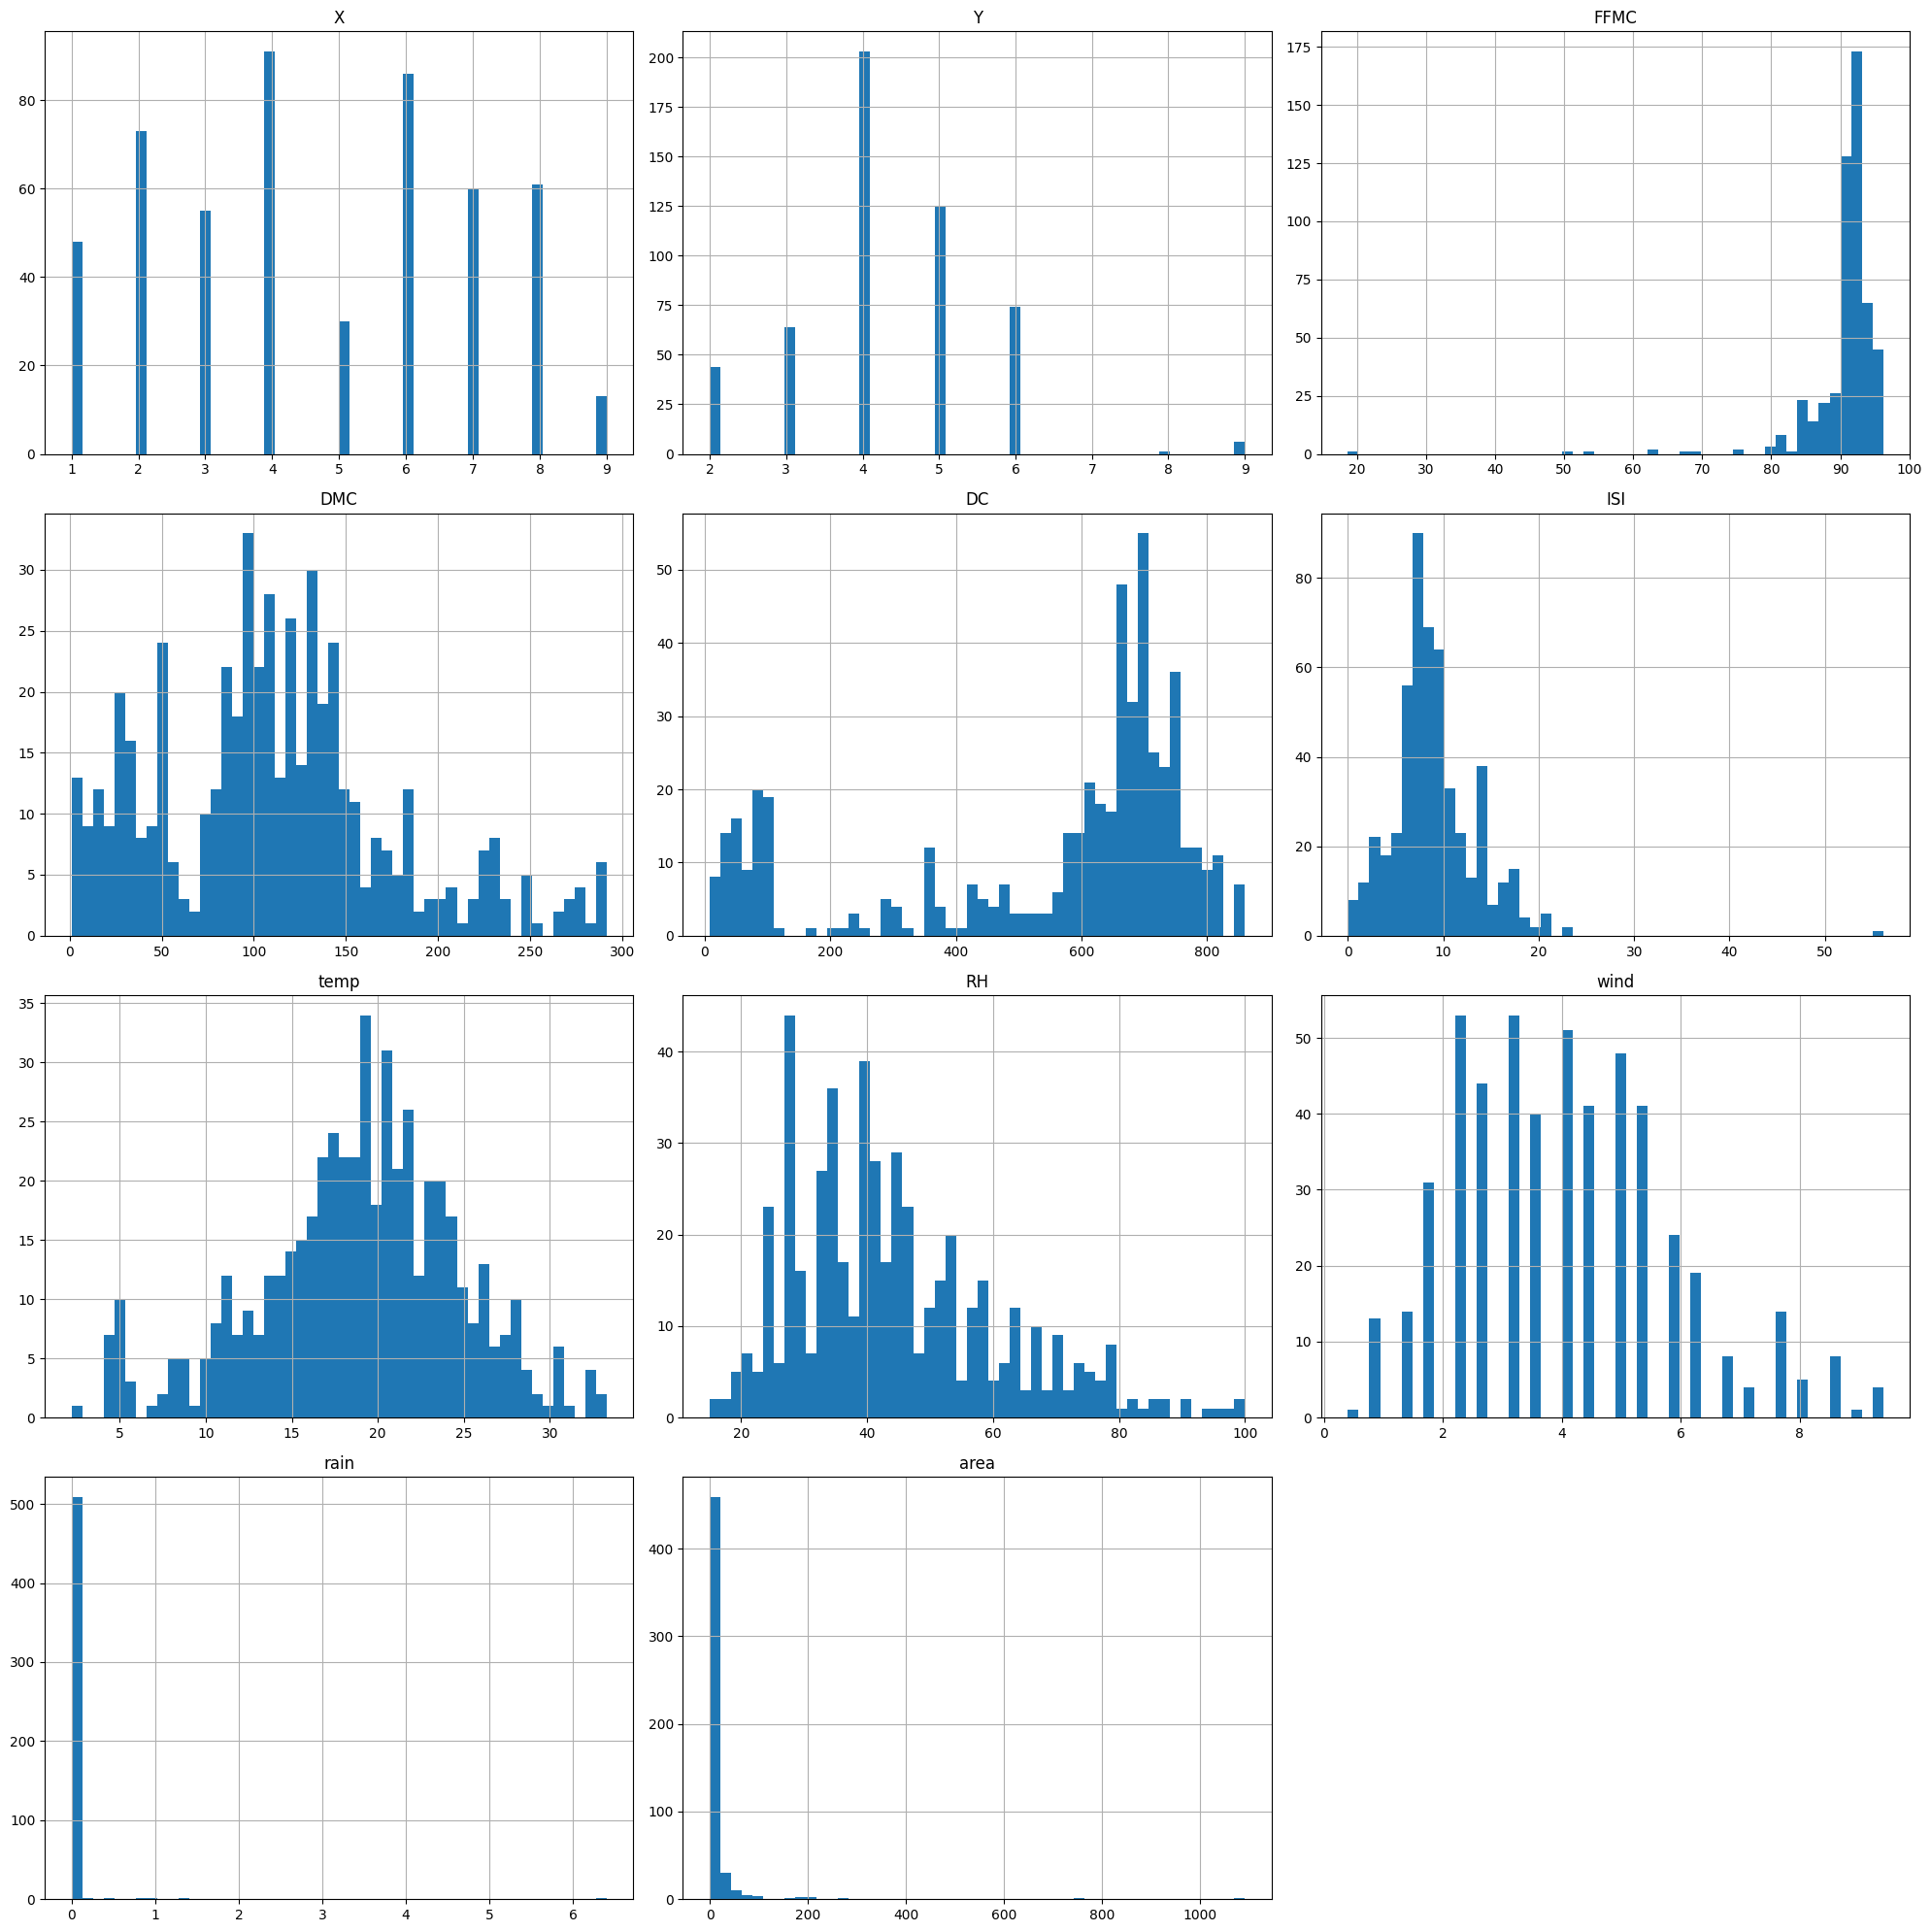

In [7]:
# Pandas histogram
forest_fire.hist (bins=50, figsize=(20,20))
plt.tight_layout ()
plt.show()

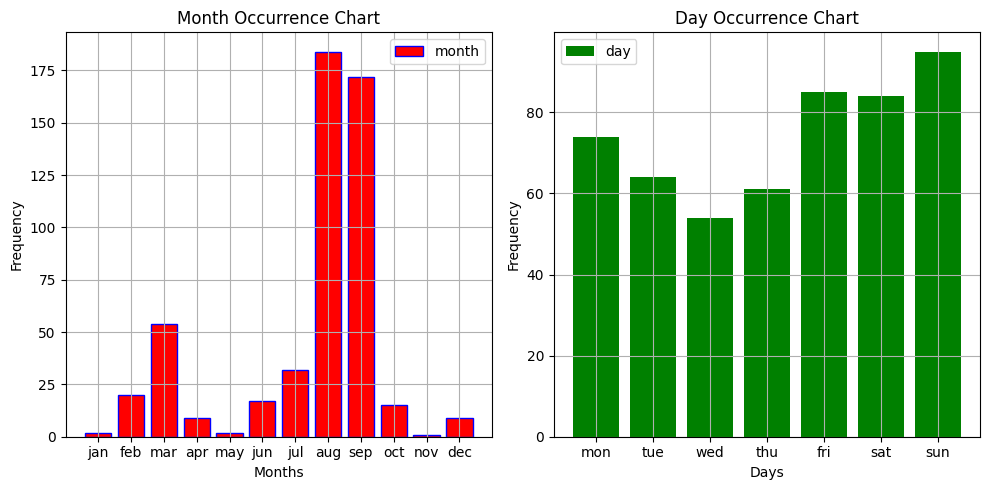

In [8]:
# Matplotlib
fig, ax = plt.subplots (1,2, figsize=(10,5))

month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
month = df["month"].value_counts ().reindex (month_order, fill_value=0)
ax [0].bar (month_order, month, color='red', edgecolor='blue',label='month')
ax [0].grid ()
ax [0].set_title ('Month Occurrence Chart')
ax [0].set_xlabel ('Months')
ax [0].set_ylabel ('Frequency')
ax [0].legend (loc = 'upper right')

day_order = ['mon','tue','wed','thu','fri','sat','sun']
day = df['day'].value_counts ().reindex (day_order, fill_value=0)
ax[1].bar (day_order, day, color='green',label='day')
ax[1].grid ()
ax[1].set_title ('Day Occurrence Chart')
ax[1].set_xlabel ('Days')
ax[1].set_ylabel ('Frequency')
ax[1].legend ()

plt.tight_layout ()

# 2. Preprocessing Data

In [9]:
def convert_day (day:str)->int:
    day_dict = {
        'sun': 0,
        'mon': 1,
        'tue': 2,
        'wed': 3,
        'thu': 4,
        'fri': 5,
        'sat': 6
    }
    return day_dict[day]

def convert_month (month:str)->int: # int là annotation: chú thích kiểu dữ liệu trả về
    month_dict = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12
    }
    return month_dict[month]

In [10]:
df["day"] = df["day"].apply(convert_day)
df['month'] = df['month'].apply(convert_month)

In [11]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [13]:
# Chuyển bộ dữ liệu df sang ma trận số
X_y = df.to_numpy()
print (X_y.shape)
X_y

(517, 13)


array([[ 7.  ,  5.  ,  3.  , ...,  6.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  0.9 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 7.  ,  4.  ,  8.  , ...,  6.7 ,  0.  , 11.16],
       [ 1.  ,  4.  ,  8.  , ...,  4.  ,  0.  ,  0.  ],
       [ 6.  ,  3.  , 11.  , ...,  4.5 ,  0.  ,  0.  ]], shape=(517, 13))

In [14]:
N = df.shape[0]
X_y_train, X_y_test = np.split(X_y, indices_or_sections=[int(0.8*N)])
X_y_train.shape, X_y_test.shape

((413, 13), (104, 13))

In [15]:
# X
X_train, X_test = X_y_train [:,:-1], X_y_test [:,:-1]
X_train.shape, X_test.shape

((413, 12), (104, 12))

In [16]:
# y
y_train, y_test = X_y_train [:,-1], X_y_test [:,-1]
y_train.shape, y_test.shape

((413,), (104,))

# 3. Assignments

## Assignment 1 (3 scores)

- Use the Numpy library only to construct the Linear Regression model.
- Train and Evaluate that Linear Regression model on the [Forest Fires](https://archive.ics.uci.edu/static/public/162/forest+fires.zip) dataset.

In [17]:
class LinearRegression2: # Tránh nhầm lẫn với LinearRegression của sklearn
    # y: np.ndarray --> type hint
    def rmse(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        delta = y - y_hat
        return (np.square (delta).mean())**0.5

    # X: tập dữ liệu X
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        cov = np.matmul(X.T, X)
        inv_cov = np.linalg.inv(cov)
        #self.theta: np.ndarray = np.matmul(int_cov, nnp.matmul(X.T, y))
        # type hint of theta
        self.theta_: np.ndarray = inv_cov @ (X.T @ y)
        
    # X: 1 mẫu dữ liệu xi để dự đoán hoặc 1 tập dữ liệu X
    def predict(self, X: np.ndarray) -> np.ndarray:
        y_pred = np.matmul(self.theta_.T, X.T)
        return y_pred

In [18]:
lin_reg = LinearRegression2 ()
lin_reg.fit (X_train, y_train)
lin_reg.theta_

array([ 0.93387474, -0.3472708 ,  2.97274599,  1.69617548, -0.08518378,
        0.11686352, -0.02830015, -0.88678297,  0.43970684, -0.18297875,
        0.04626583, -6.54744483])

In [19]:
# DỰ ĐOÁN TẬP y_train
y_train_hat = lin_reg.predict (X_train)
# Bảng so sánh 
prediction_table = pd.DataFrame  ({
    "Y_train" : y_train,
    "Y_train_hat" : y_train_hat
})
prediction_table.head ()

,Y_train,Y_train_hat
0,0.0,5.311231
1,0.0,11.728156
2,0.0,17.502586
3,0.0,-6.531415
4,0.0,-11.730553


In [20]:
# RMSE của tập train
lin_rmse_train = lin_reg.rmse (y_train, y_train_hat)
lin_rmse_train

np.float64(58.07453450007617)

In [21]:
# DỰ ĐOÁN TẬP TEST
y_test_hat = lin_reg.predict (X_test)
# RMSE của tập test
lin_rmse_test = lin_reg.rmse (y_test, y_test_hat)
lin_rmse_test

np.float64(79.42477263962975)

- CÓ SỰ CHÊNH LỆCH ĐÁNG KỂ GIỮA RMSE CỦA TẬP TRAIN VÀ TEST

## Assignment 2 (3 scores)

- Standardize the data so that their mean is $0$ and their variance is $1$.
- Compare the results of Linear Regression model when being trained on the original and standardized data.

In [22]:
def Standardize (x : np.ndarray)->np.ndarray:
        '''Hàm chuẩn hoá dữ liệu'''
        return (x - np.mean(x)) / np.std(x)
        

In [23]:
'''Copy các tập dữ liệu training và testing'''
X_train_std = X_train.copy()
X_test_std = X_test.copy()
y_train_std = y_train.copy()
y_test_std = y_test.copy()

CHUẨN HOÁ CÁC BIẾN
+ FFMC
+ DMC
+ DC
+ ISI
+ temp
+ wind
+ area

In [24]:
# Standardize training data
X_train_std [:,4] = Standardize (X_train_std [:,4])
X_train_std [:,5] = Standardize (X_train_std [:,5])
X_train_std [:,6] = Standardize (X_train_std [:,6])
X_train_std [:,7] = Standardize (X_train_std [:,7])
X_train_std [:,8] = Standardize (X_train_std [:,8])
X_train_std [:,10] = Standardize (X_train_std [:,10])
y_train_std  = Standardize (y_train_std)

# Standardize testing data
X_test_std [:,4] = Standardize (X_test_std [:,4])
X_test_std [:,5] = Standardize (X_test_std [:,5])
X_test_std [:,6] = Standardize (X_test_std [:,6])
X_test_std [:,7] = Standardize (X_test_std [:,7])
X_test_std [:,8] = Standardize (X_test_std [:,8])
X_test_std [:,10] = Standardize (X_test_std [:,10])
y_test_std  = Standardize (y_test_std)

In [25]:
# Kiểm tra kỳ vọng và độ lệch chuẩn của 1 biến bất kỳ
print (X_train_std [:,10].mean ())
print (y_train_std.std())

-1.2043097216272884e-16
0.9999999999999999


In [26]:
# Sau khi chuẩn hoá xong, tiến hành huấn luyện lại mô hình
lin_reg_2 = LinearRegression2()
lin_reg_2.fit (X_train_std, y_train_std)
lin_reg_2.theta_

array([ 0.01519743, -0.01093168,  0.01609657,  0.02482192, -0.00676021,
        0.10189521, -0.03198811, -0.06568446,  0.01371588, -0.00495127,
        0.00763841, -0.07482453])

In [27]:
# DỰ ĐOÁN TẬP y_train (ĐÃ CHUẨN HOÁ)
y_train_hat_std = lin_reg_2.predict (X_train_std)
prediction_table_std = pd.DataFrame ({
    'Original label (Unormalized)' : y_train,
    'Original label (Normalized)' : y_train_std,
    'Predicted (Unormalized)' : y_train_hat,
    'Predicted (Normalized)' : y_train_hat_std,
})
prediction_table_std.tail (20)

,Original label (Unormalized),Original label (Normalized),Predicted (Unormalized),Predicted (Normalized)
393,0.00,-0.192756,-0.689198,-0.136772
394,0.00,-0.192756,-8.419191,-0.297017
395,51.78,0.689229,-9.778596,-0.323357
396,3.64,-0.130754,0.824273,-0.160903
397,3.63,-0.130925,20.477831,0.149805
398,0.00,-0.192756,31.213891,0.354892
399,0.00,-0.192756,12.889413,-0.030874
400,8.16,-0.053764,12.889413,-0.030874
401,4.95,-0.108441,11.224915,-0.009661
402,0.00,-0.192756,29.944266,0.296141


In [28]:
# RMSE của tập train (Sau chuẩn hoá)
lin_rmse_train_std = lin_reg_2.rmse (y_train_std, y_train_hat_std)
lin_rmse_train_std

np.float64(0.9900661651962399)

In [29]:
# RMSE của tập test (Sau chuẩn hoá)
y_test_hat_std = lin_reg_2.predict (X_test_std)
lin_rmse_test_std = lin_reg_2.rmse (y_test_std, y_test_hat_std)
lin_rmse_test_std

np.float64(0.9943592866817745)

## Assignment 3 (2 scores)

- Perform feature engineering to remove columns that are linearly dependent (colinear) with other columns in the dataset.
- Evaluate the Linear Regression model when beeing trained on the original data and preprocessed data.

In [30]:
corr_matrix = df.corr()
print (corr_matrix["area"])

X        0.063385
Y        0.044873
month    0.056496
day      0.048359
FFMC     0.040122
DMC      0.072994
DC       0.049383
ISI      0.008258
temp     0.097844
RH      -0.075519
wind     0.012317
rain    -0.007366
area     1.000000
Name: area, dtype: float64


In [31]:
cov = np.zeros((len(df.columns[:-1]),len(df.columns[:-1])))
for i, col_name_i in enumerate(df.columns[:-1]):
    for j, col_name_j in enumerate(df.columns[:-1]):
        cov[i, j] = np.corrcoef(df[col_name_i].to_numpy(), df[col_name_j].to_numpy())[0,1]
cov

array([[ 1.        ,  0.53954817, -0.06500303,  0.01303706, -0.02103927,
        -0.04838418, -0.08591612,  0.00620994, -0.05125826,  0.08522319,
         0.01879782,  0.06538717],
       [ 0.53954817,  1.        , -0.06629179, -0.01308485, -0.04630755,
         0.00778156, -0.10117777, -0.02448799, -0.02410308,  0.06222073,
        -0.02034085,  0.0332341 ],
       [-0.06500303, -0.06629179,  1.        , -0.03746891,  0.29147677,
         0.46664525,  0.86869776,  0.18659697,  0.36884151, -0.09528038,
        -0.08636797,  0.01343813],
       [ 0.01303706, -0.01308485, -0.03746891,  1.        ,  0.0735974 ,
         0.02869724,  0.00191262,  0.03592556,  0.03223298, -0.08331774,
        -0.00401293, -0.02411943],
       [-0.02103927, -0.04630755,  0.29147677,  0.0735974 ,  1.        ,
         0.3826188 ,  0.3305118 ,  0.53180493,  0.43153226, -0.30099542,
        -0.02848481,  0.05670153],
       [-0.04838418,  0.00778156,  0.46664525,  0.02869724,  0.3826188 ,
         1.        ,  

Text(0.5, 1.0, 'Feature Correlation Matrix')

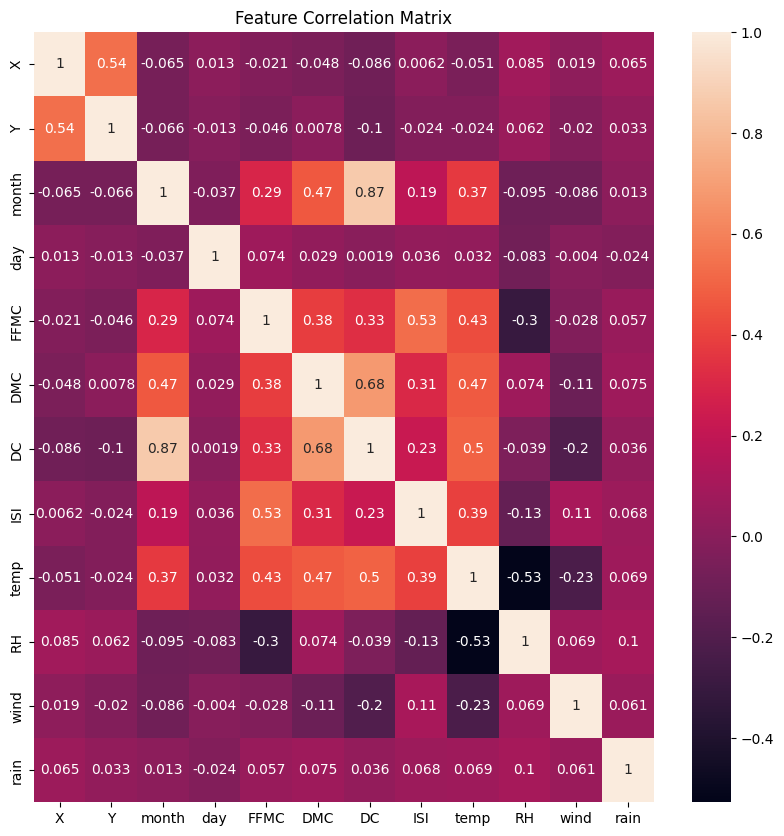

In [32]:
plt.figure (figsize=(10,10))
sns.heatmap(cov, xticklabels=df.columns[:-1], yticklabels=df.columns[:-1], annot=cov)
plt.title ("Feature Correlation Matrix")

TIẾN HÀNH BỎ ĐI BIẾN DMC VÀ HUẤN LUYỆN LẠI

In [33]:
# Huấn luyện trên dữ liệu đã chuẩn hoá và bỏ đi biến DMC
X_train_std_delDMC = X_train_std.copy ()
# y_train_std_delDMC = y_train_std.copy () : không cần thiết
X_test_std_delDMC = X_test_std.copy ()
# y_test_std_delDMC = y_test_std.copy ()

X_train_std_delDMC = np.delete (X_train_std_delDMC, 5, axis=1)
X_test_std_delDMC = np.delete (X_test_std_delDMC, 5, axis=1)

X_train_std_delDMC.shape

(413, 11)

In [34]:
lin_reg_delDMC = LinearRegression2 ()
lin_reg_delDMC.fit (X_train_std_delDMC, y_train_std)
lin_reg_delDMC.theta_

array([ 0.01252358, -0.00400353,  0.00423523,  0.0243017 ,  0.00986393,
        0.04399592, -0.05961889,  0.04391881, -0.00327304,  0.0154233 ,
       -0.0610642 ])

In [35]:
y_train_hat_delDMC = lin_reg_delDMC.predict (X_train_std_delDMC)
y_train_hat_delDMC

array([-6.06385422e-02,  7.72546273e-02,  1.53081684e-01, -2.82754997e-01,
       -3.99767012e-01, -2.44513201e-02,  8.60922359e-02, -2.57950055e-01,
       -2.14049827e-02,  2.12572913e-01,  1.62981535e-01, -1.29036477e-02,
        7.06887473e-02,  4.06385558e-02,  1.96146348e-01,  8.90825181e-02,
        3.38163857e-02,  7.80008636e-02, -4.02847826e-02, -2.69251590e-02,
        5.63683683e-02,  1.03425562e-02, -7.02487233e-01,  1.70502864e-01,
        6.90369332e-02, -1.05931282e-01,  1.22708018e-01,  1.41620957e-02,
        3.02340375e-01,  5.57670669e-02,  1.38908617e-01, -1.06924267e-01,
        1.68636165e-01,  1.29291495e-02,  6.37759955e-02,  1.77728410e-02,
        1.59584008e-01,  2.01381543e-02,  2.26262244e-01, -1.10973990e-01,
        7.33168883e-02,  1.14265571e-01, -1.44103102e-01,  1.15325453e-01,
       -6.44349138e-02,  7.33233034e-02, -1.09761923e-01, -2.10048835e-02,
       -1.41789045e-01, -1.54365341e-01,  1.40120324e-01,  2.12628993e-02,
        4.55291641e-02,  

In [36]:
lin_rmse_train_delDMC = lin_reg_delDMC.rmse (y_train_std, y_train_hat_delDMC)
lin_rmse_train_delDMC

np.float64(0.9922381677568166)

**KẾT LUẬN**: Không có sự chênh lệch đáng kể so với RMSE của tập dữ liệu đầy đủ

## Assignment 4 (2 scores)

- Implement the Linear Regression model using Machine Learning libraries (Scikit Learn or SKorch).
- Compare the results of Linear Regression model constructed manually and from Machine Learning libraries.

In [37]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression ()
linear_reg.fit (X_train, y_train)
print("Theta (hệ số hồi quy):", linear_reg.coef_)  # Hệ số của các biến đầu vào (slope)
print("Intercept (hệ số chặn):", linear_reg.intercept_)  # Hệ số chặn (bias)
y_hat_LR = linear_reg.predict (X_train)
prediction_table_std = pd.DataFrame ({
    'Original label (Unormalized)' : y_train,
    'Original label (Normalized)' : y_train_std,
    'Predicted (Unormalized)' : y_train_hat,
    'Predicted (Normalized)' : y_train_hat_std,
    'Predicted (Using LR)' : y_hat_LR
})
prediction_table_std.tail (20)

Theta (hệ số hồi quy): [ 0.9257813  -0.30393752  3.00639475  1.70203935 -0.02902821  0.11496131
 -0.02870625 -0.91561265  0.473705   -0.16851216  0.08572188 -7.12425511]
Intercept (hệ số chặn): -6.242948514144899


,Original label (Unormalized),Original label (Normalized),Predicted (Unormalized),Predicted (Normalized),Predicted (Using LR)
393,0.00,-0.192756,-0.689198,-0.136772,-0.693482
394,0.00,-0.192756,-8.419191,-0.297017,-8.554391
395,51.78,0.689229,-9.778596,-0.323357,-9.826532
396,3.64,-0.130754,0.824273,-0.160903,0.929045
397,3.63,-0.130925,20.477831,0.149805,20.500131
398,0.00,-0.192756,31.213891,0.354892,31.109286
399,0.00,-0.192756,12.889413,-0.030874,13.251781
400,8.16,-0.053764,12.889413,-0.030874,13.251781
401,4.95,-0.108441,11.224915,-0.009661,11.467324
402,0.00,-0.192756,29.944266,0.296141,30.104356


In [38]:
from sklearn.metrics import mean_squared_error
linear_rmse_train = np.sqrt (mean_squared_error (y_train, y_hat_LR))
linear_rmse_train

np.float64(58.07383068881396)

In [39]:
linear_reg_std = LinearRegression ()
linear_reg_std.fit (X_train_std, y_train_std)
print("Theta (hệ số hồi quy):", linear_reg_std.coef_)  # Hệ số của các biến đầu vào (slope)
print("Intercept (hệ số chặn):", linear_reg_std.intercept_)  # Hệ số chặn (bias)
y_train_hat_LR_std= linear_reg_std.predict (X_train_std)
prediction_table_std = pd.DataFrame ({
    'Original label (Unnormalized)' : y_train,
    'Original label (Normalized)' : y_train_std,
    'Predicted (Unnormalized)' : y_train_hat,
    'Predicted (Normalized)' : y_train_hat_std,
    'Predicted (Using LR - Unnormalized)' : y_hat_LR,
    'Predicted (Using LR - Normalized)' : y_train_hat_LR_std
})
prediction_table_std.tail (20)

Theta (hệ số hồi quy): [ 0.01576912 -0.00517706  0.05120886  0.02899136 -0.00285168  0.10620028
 -0.12205361 -0.06986193  0.04309558 -0.00287032  0.00261798 -0.12134965]
Intercept (hệ số chặn): -0.398070140167293


,Original label (Unnormalized),Original label (Normalized),Predicted (Unnormalized),Predicted (Normalized),Predicted (Using LR - Unnormalized),Predicted (Using LR - Normalized)
393,0.00,-0.192756,-0.689198,-0.136772,-0.693482,-0.204568
394,0.00,-0.192756,-8.419191,-0.297017,-8.554391,-0.338465
395,51.78,0.689229,-9.778596,-0.323357,-9.826532,-0.360134
396,3.64,-0.130754,0.824273,-0.160903,0.929045,-0.176931
397,3.63,-0.130925,20.477831,0.149805,20.500131,0.156429
398,0.00,-0.192756,31.213891,0.354892,31.109286,0.337139
399,0.00,-0.192756,12.889413,-0.030874,13.251781,0.032966
400,8.16,-0.053764,12.889413,-0.030874,13.251781,0.032966
401,4.95,-0.108441,11.224915,-0.009661,11.467324,0.002571
402,0.00,-0.192756,29.944266,0.296141,30.104356,0.320021


In [40]:
linear_rmse_train_std = np.sqrt (mean_squared_error (y_train_std, y_train_hat_LR_std))
linear_rmse_train_std

np.float64(0.9891895879285214)

In [41]:
# RMSE của tập test (Sau chuẩn hoá)
y_test_LR_hat_std = linear_reg_std.predict (X_test_std)
linear_rmse_test_std = np.sqrt (mean_squared_error (y_test_std, y_test_LR_hat_std))
linear_rmse_test_std


np.float64(0.9941966992056184)

In [42]:
rmse_table = pd.Series ([lin_rmse_train_std, lin_rmse_test_std, linear_rmse_train_std, linear_rmse_test_std],
                        index = ['RMSE_train (Mannually)','RMSE_test (Mannually)',
                                 'RMSE_train (Library)','RMSE_test (Library)'])
rmse_table 

RMSE_train (Mannually)    0.990066
RMSE_test (Mannually)     0.994359
RMSE_train (Library)      0.989190
RMSE_test (Library)       0.994197
dtype: float64